<img style="float: left;" src="https://mms.businesswire.com/media/20230410005465/en/700773/22/Logo.jpg" height="175"> <img style="float: center;" src="https://avatars.githubusercontent.com/u/19476722?s=280&v=4" width="175" height="175"> <img style="float: right;" src="https://pbs.twimg.com/profile_images/1537109064093532160/mG03dW9G_400x400.jpg" width="175" height="175">


# **Time Series Data Exercises**

Here we'll introduce working with time series data and `datetime` objects using `pandas`. In this workshop we will cover the following topics:
* Opening time series data as `.csv`
* Indexing
* Subsetting
* Resampling
* Plotting

### Additional Resources:

* Read more about handling time-series data with `pandas` in our open **Intermediate Earth Data Science** textbook [here](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/).

* Read the `pandas` **documentation** for time series/date functionality [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#).

In [ ]:
# Install missing python packages
%pip install hvplot geoviews

In [ ]:
# Import libraries
import pandas as pd
import holoviews as hv
import hvplot.pandas

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# **Historical Meteorological Data**

Here we're using the NOAA National Centers for Environmental Information (NCEI) [Access Data Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation) application progamming interface (API) to request data from their web servers. We will be using daily summary data collected as part of the [Global Historical Climatology Network daily (GHCNd)](https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) program at NOAA.

For this example we're requesting data for **BOGOTA ELDORADO, CO** (station ID GHCND:CO000080222) located near the Aeropuerto Internacional El Dorado (**4.701°, -74.15°**).

https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:CO000080222/detail

In [4]:
bogota_ncei_url = ("https://www.ncei.noaa.gov/access/services/data/v1"
    "?dataset=daily-summaries"
    "&dataTypes=TMIN,TMAX,TAVG,PRCP"
    "&stations=CO000080222"
    "&startDate=1941-03-02"
    "&endDate=2024-03-21"
    "&includeStationName=true"
    "&units=standard")

In [5]:
bogota_df = pd.read_csv(
    bogota_ncei_url,
    na_values=["-99"],
    index_col=["DATE"],
    parse_dates=["DATE"])
bogota_df

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1941-03-02,CO000080222,"BOGOTA ELDORADO, CO",NaN,63.0,NaN,NaN
1941-03-12,CO000080222,"BOGOTA ELDORADO, CO",NaN,62.0,NaN,NaN
1941-03-13,CO000080222,"BOGOTA ELDORADO, CO",NaN,66.0,NaN,NaN
1941-03-16,CO000080222,"BOGOTA ELDORADO, CO",NaN,62.0,NaN,NaN
1941-03-19,CO000080222,"BOGOTA ELDORADO, CO",NaN,63.0,NaN,NaN
...,...,...,...,...,...,...
2024-03-17,CO000080222,"BOGOTA ELDORADO, CO",NaN,61.0,NaN,48.0
2024-03-18,CO000080222,"BOGOTA ELDORADO, CO",NaN,61.0,NaN,51.0
2024-03-19,CO000080222,"BOGOTA ELDORADO, CO",NaN,61.0,NaN,53.0


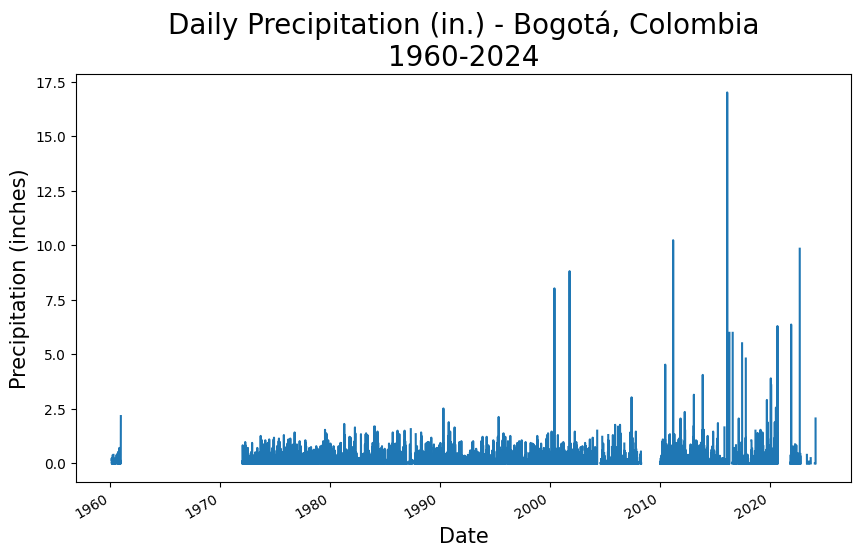

In [48]:
# Plot precip vs time
fig, ax = plt.subplots(figsize=(10,6))
bogota_df.plot(ax=ax,
                y='PRCP',
                legend=False)
plt.title('Daily Precipitation (in.) - Bogotá, Colombia\n1960-2024', fontsize=20)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Precipitation (inches)', fontsize = 15)


plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
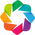

:Curve   [DATE]   (PRCP)

In [7]:
# Load bokeh extension for interactive plots
hv.extension('bokeh')

# Plot data
bogota_df.hvplot(
    y='PRCP',
    ylabel='Precipitation (in)',
    xlabel='',
    title='Precipitation (in) @ Bogota, CO\nAeropuerto Internacional El Dorado 1960-2024')

## **Subsetting & Resampling**

In [53]:
# Subset by year - 2016
bogotá_precip_2016 = bogota_df.loc['2016']
bogotá_precip_2016

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2016-01-01,CO000080222,"BOGOTA ELDORADO, CO",0.00,60.0,NaN,46.0
2016-01-02,CO000080222,"BOGOTA ELDORADO, CO",0.00,57.0,NaN,48.0
2016-01-03,CO000080222,"BOGOTA ELDORADO, CO",0.01,58.0,NaN,42.0
2016-01-04,CO000080222,"BOGOTA ELDORADO, CO",0.00,60.0,NaN,49.0
2016-01-05,CO000080222,"BOGOTA ELDORADO, CO",NaN,59.0,NaN,NaN
...,...,...,...,...,...,...
2016-12-27,CO000080222,"BOGOTA ELDORADO, CO",NaN,57.0,70.0,47.0
2016-12-28,CO000080222,"BOGOTA ELDORADO, CO",NaN,58.0,NaN,47.0
2016-12-29,CO000080222,"BOGOTA ELDORADO, CO",NaN,57.0,NaN,NaN


<Axes: xlabel='DATE'>

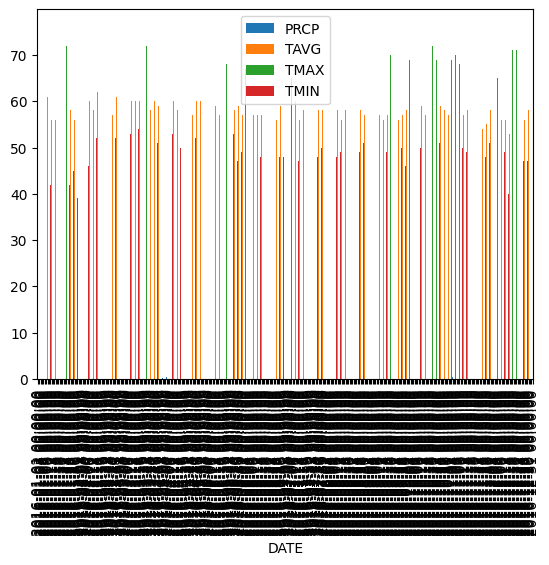

In [54]:
# Plot subset data
bogotá_precip_2016.plot(kind='bar')

In [56]:
# Resample to calculate monthly maximum
bogotá_precip_2016_monthly_max = bogotá_precip_2016.resample("M").max()

date_precip = bogotá_precip_2016_monthly_max.reset_index()
date_precip

,DATE,STATION,NAME,PRCP,TAVG,TMAX,TMIN
0,2016-01-31,CO000080222,"BOGOTA ELDORADO, CO",0.20,61.0,73.0,53.0
1,2016-02-29,CO000080222,"BOGOTA ELDORADO, CO",17.02,62.0,76.0,55.0
2,2016-03-31,CO000080222,"BOGOTA ELDORADO, CO",0.31,63.0,75.0,54.0
3,2016-04-30,CO000080222,"BOGOTA ELDORADO, CO",0.59,61.0,NaN,55.0
4,2016-05-31,CO000080222,"BOGOTA ELDORADO, CO",5.99,61.0,71.0,54.0
5,2016-06-30,CO000080222,"BOGOTA ELDORADO, CO",NaN,59.0,71.0,52.0
6,2016-07-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,60.0,67.0,52.0
7,2016-08-31,CO000080222,"BOGOTA ELDORADO, CO",5.99,59.0,68.0,52.0
8,2016-09-30,CO000080222,"BOGOTA ELDORADO, CO",0.00,60.0,73.0,53.0
9,2016-10-31,CO000080222,"BOGOTA ELDORADO, CO",0.71,60.0,72.0,54.0


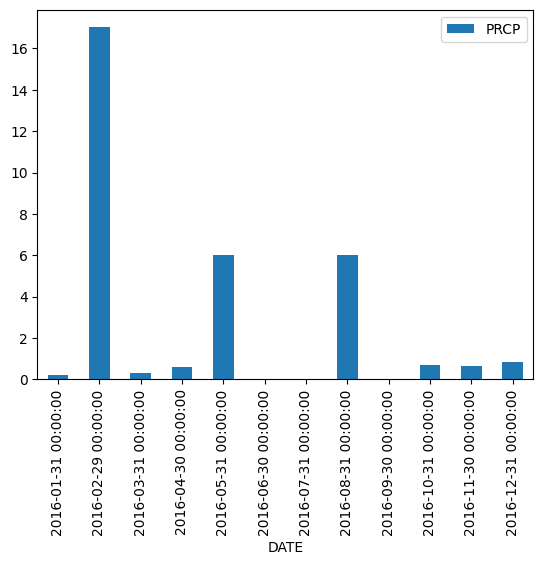

In [57]:
# Plot resampled data
fig, ax = plt.subplots()

# Add x-axis and y-axis
date_precip.plot(kind='bar',
                 x='DATE',
                 y='PRCP',
                 ax=ax)

plt.show()

In [58]:
# Create month column and add to bogotá_precip_2016_monthly_mean

# Create list
months = ['enero','feb','mar','abr',
          'mayo','Jun','Jul','agosto',
          'sept','oct','nov','dic']
# List -> pd df
months_df = pd.DataFrame(months)

# Rename columns
months_df.columns = ['mes']
months_df

,mes
0,enero
1,feb
2,mar
3,abr
4,mayo
5,Jun
6,Jul
7,agosto
8,sept
9,oct


In [59]:
# Concat months_df to date_precip 'by row'
monthly_precip_2016 = pd.concat([months_df, date_precip], axis=1)
monthly_precip_2016

# Set mes as index
monthly_temps_precip_2016_reindex = monthly_precip_2016.set_index('mes')
monthly_temps_precip_2016_reindex

,DATE,STATION,NAME,PRCP,TAVG,TMAX,TMIN
mes,,,,,,,
enero,2016-01-31,CO000080222,"BOGOTA ELDORADO, CO",0.20,61.0,73.0,53.0
feb,2016-02-29,CO000080222,"BOGOTA ELDORADO, CO",17.02,62.0,76.0,55.0
mar,2016-03-31,CO000080222,"BOGOTA ELDORADO, CO",0.31,63.0,75.0,54.0
abr,2016-04-30,CO000080222,"BOGOTA ELDORADO, CO",0.59,61.0,NaN,55.0
mayo,2016-05-31,CO000080222,"BOGOTA ELDORADO, CO",5.99,61.0,71.0,54.0
Jun,2016-06-30,CO000080222,"BOGOTA ELDORADO, CO",NaN,59.0,71.0,52.0
Jul,2016-07-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,60.0,67.0,52.0
agosto,2016-08-31,CO000080222,"BOGOTA ELDORADO, CO",5.99,59.0,68.0,52.0
sept,2016-09-30,CO000080222,"BOGOTA ELDORADO, CO",0.00,60.0,73.0,53.0


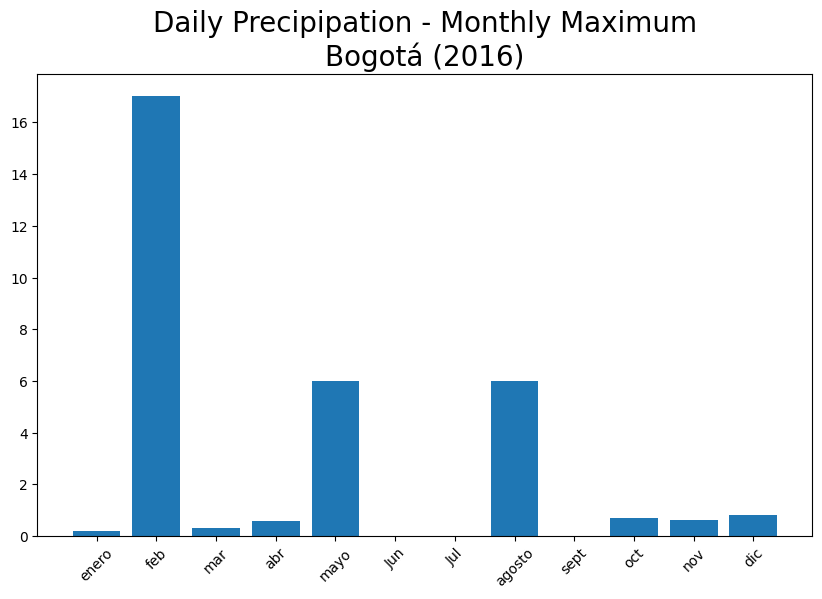

In [60]:
# Plot months and precip
fig, ax = plt.subplots(figsize=(10,6))

# Add x-axis and y-axis
ax.bar(monthly_temps_precip_2016_reindex.index.values,
       monthly_temps_precip_2016_reindex['PRCP'])

plt.title("Daily Precipipation - Monthly Maximum\nBogotá (2016)", fontsize=20)
plt.xticks(rotation=45)

plt.show()

In [61]:
# Resample entire df to yearly & plot
time_rain_yr_max = bogota_df.resample("Y").max()
time_rain_yr_max

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1941-12-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,69.0,NaN,NaN
1942-12-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,69.0,NaN,NaN
1943-12-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,66.0,NaN,NaN
1944-12-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,65.0,NaN,NaN
1945-12-31,CO000080222,"BOGOTA ELDORADO, CO",NaN,67.0,NaN,NaN
...,...,...,...,...,...,...
2020-12-31,CO000080222,"BOGOTA ELDORADO, CO",6.30,62.0,77.0,55.0
2021-12-31,CO000080222,"BOGOTA ELDORADO, CO",6.37,62.0,72.0,54.0
2022-12-31,CO000080222,"BOGOTA ELDORADO, CO",9.85,61.0,73.0,54.0


<Axes: xlabel='DATE'>

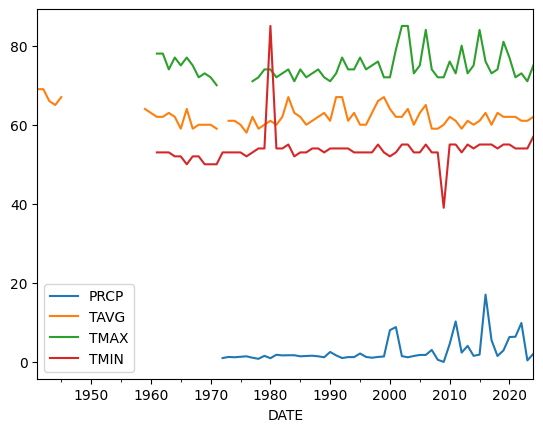

In [64]:
time_rain_yr_max.plot()

In [65]:
# Resample entire df to yearly sum & plot
time_rain_yr_sum = bogota_df.resample("Y").sum()
time_rain_yr_sum

<ipython-input-65-51dd81cf1dde>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_rain_yr_sum = bogota_df.resample("Y").sum()


,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1941-12-31,0.00,17254.0,0.0,0.0
1942-12-31,0.00,20146.0,0.0,0.0
1943-12-31,0.00,21086.0,0.0,0.0
1944-12-31,0.00,21835.0,0.0,0.0
1945-12-31,0.00,10367.0,0.0,0.0
...,...,...,...,...
2020-12-31,39.58,21050.0,11004.0,10192.0
2021-12-31,7.85,20742.0,1268.0,1311.0
2022-12-31,29.64,20649.0,8244.0,13231.0


<Axes: xlabel='DATE'>

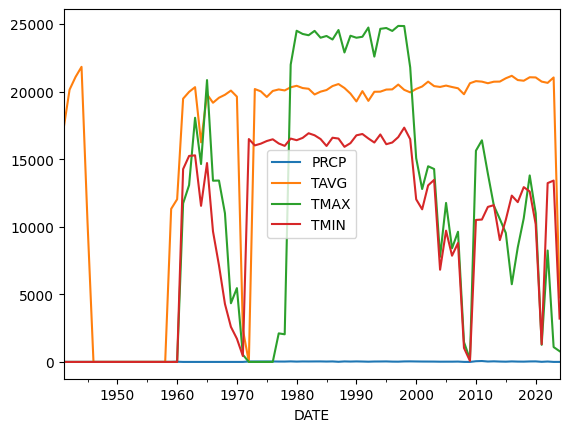

In [66]:
time_rain_yr_sum.plot()

<ipython-input-67-29aca070c4b0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['enero','feb','mar','abr',


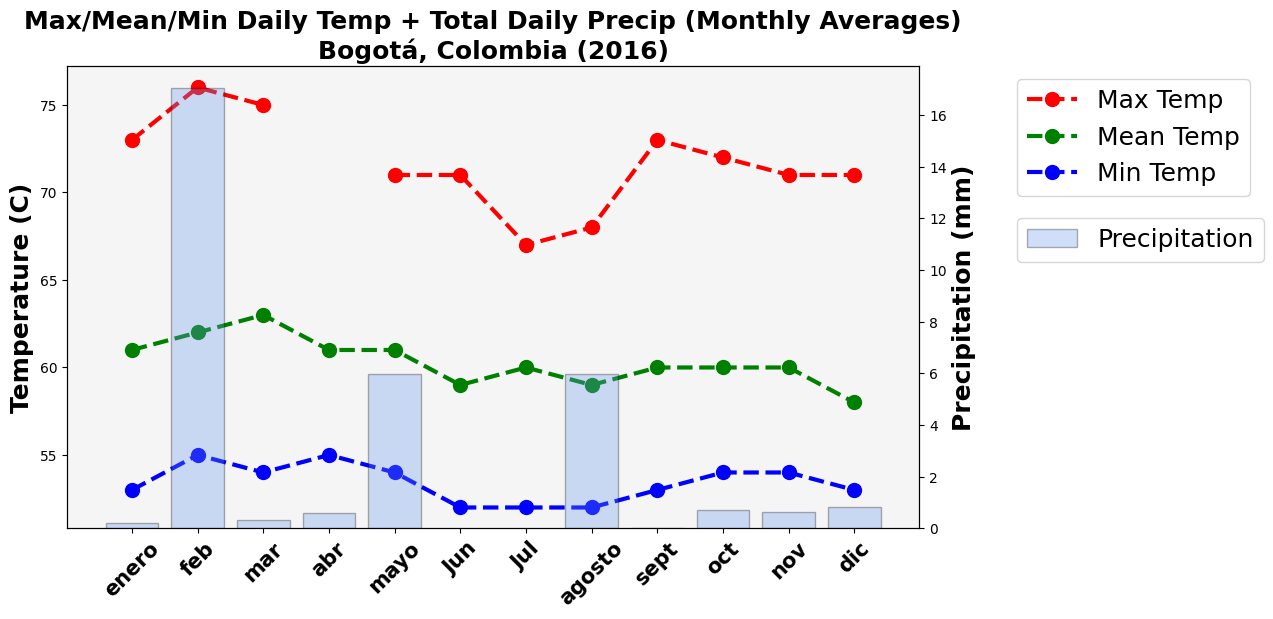

In [67]:
# Handle date time conversions between pandas and matplotlib
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

# Use white grid plot background from seaborn
#sns.set(font_scale=1.5, style="whitegrid")

fig, ax1 = plt.subplots(figsize=(11,6))
ax2 = ax1.twinx()


# Set axis tick labels
ax1.set_xticklabels(['enero','feb','mar','abr',
          'mayo','Jun','Jul','agosto',
          'sept','oct','nov','dic'], rotation=45, weight = 'bold', fontsize=15)

#ax1.set_yticklabels(['8','10','12','14','16',
         # '18','20'], fontsize=15)

#ax2.set_yticklabels(['0','1','2','3','4',
         # '5','6'], fontsize=15)

# Plot the precip data
ax2.bar(monthly_temps_precip_2016_reindex.index.values,
         monthly_temps_precip_2016_reindex['PRCP'],
         color='cornflowerblue',
         edgecolor='black',
         alpha=0.3,
         label='Precipitation')


# Plot max temp data
ax1.plot(monthly_temps_precip_2016_reindex.index.values,
           monthly_temps_precip_2016_reindex['TMAX'],
           color='red',
           marker='o',
           markersize=10,
           linestyle='--',
           label='Max Temp',
           linewidth=3)


# Plot mean temp data
ax1.plot(monthly_temps_precip_2016_reindex.index.values,
           monthly_temps_precip_2016_reindex['TAVG'],
           color='green',
           marker='o',
           markersize=10,
           linestyle='--',
           label='Mean Temp',
           linewidth=3)

# Plot min temp data
ax1.plot(monthly_temps_precip_2016_reindex.index.values,
           monthly_temps_precip_2016_reindex['TMIN'],
           color='blue',
           marker='o',
           markersize=10,
           linestyle='--',
           label='Min Temp',
           linewidth=3)

ax1.set_facecolor("whitesmoke")

ax1.legend(bbox_to_anchor = (1.1, 1.0), loc="upper left", prop={'size': 18})
ax2.legend(bbox_to_anchor = (1.1, 0.7), loc="upper left", prop={'size': 18})

# Turn off grid lines
ax1.grid(False)
ax2.grid(False)

ax1.set_ylabel('Temperature (C)', fontsize=18, weight='bold')
ax2.set_ylabel('Precipitation (mm)', fontsize=18, weight='bold')

plt.title("Max/Mean/Min Daily Temp + Total Daily Precip (Monthly Averages)\nBogotá, Colombia (2016)",
          fontsize=18, weight='bold')
plt.show()

## Optional Challenges
* Repeat this workflow for another sampling location of your choice

* Use **ChatGPT** to figure out how to add a trendline to the precipitation vs. time plot at the top of the notebook

* Use **ChatGPT** and `folium` to make an interactive map that is centered on the lat/lon of the weather station

* Create a plot of average monthly temperature from 1980-2024 with a trendline